In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

geocode = pd.read_csv('/content/drive/My Drive/Policing-Geospatial-DataViz/final/offprofile_geocodedincident.csv')
geocode

<ipython-input-2-3c0372fef78b>:3: DtypeWarning: Columns (4,45) have mixed types. Specify dtype option on import or set low_memory=False.
  geocode = pd.read_csv('/content/drive/My Drive/Policing-Geospatial-DataViz/final/offprofile_geocodedincident.csv')


,trr_id,rd_no,cr_no_obtained,subject_cb_no,event_no,beat,block,street_direction,street_name,location,...,star7,star8,star9,star10,star11,sworn,unit_id,unit_detail,star,source
0,7.0,HK-131349,NaN,15703260.0,401716237,1131.0,4499.0,West,VAN BUREN ST,STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
1,5554.0,HK801325,NaN,16031304.0,434511047,1132.0,3999.0,West,FLOURNOY ST,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
2,15280.0,HM348634,NaN,16533991.0,613309864,1121.0,3299.0,West,HURON ST,STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
3,33.0,HK149368,NaN,15712445.0,402711046,1112.0,899.0,North,SPRINGFIELD AVE,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
4,40.0,HK151340,NaN,15713384.0,402813874,1115.0,4299.0,West,WILCOX ST,ALLEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,96387.0,HZ219663,1080034.0,19292598.0,1610009159,2223.0,8899.0,South,NORMAL AVE,STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
10575,96395.0,HZ221025,1080051.0,19293191.0,1610111757,1112.0,3799.0,West,CHICAGO AVE,GAS STATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
10576,96406.0,HZ215057,NaN,19293396.0,1610202999,1924.0,3299.0,North,SHEFFIELD AVE,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155
10577,96432.0,HZ222592,NaN,1929386.0,1610301380,324.0,7499.0,South,EAST END AVE,SIDEWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155


In [ ]:
print(geocode.columns.tolist())

['trr_id', 'rd_no', 'cr_no_obtained', 'subject_cb_no', 'event_no', 'beat', 'block', 'street_direction', 'street_name', 'location', 'date', 'time', 'indoor_or_outdoor', 'lighting_condition', 'weather_condition', 'notify_oemc', 'notify_dist_sergeant', 'notify_op_command', 'notify_det_div', 'number_of_weapons_discharged', 'party_fired_first', 'duty_status', 'injured', 'member_in_uniform', 'subject_gender', 'subject_race', 'subject_age', 'subject_birthyear', 'subject_armed', 'subject_injured', 'subject_alleged_injury', 'uid', 'address', 'loc', 'lon', 'lat', 'last_name', 'first_name', 'middle_initial', 'gender', 'race', 'birthyear', 'age', 'status', 'appointment_date', 'position_no', 'position_description', 'unit_no', 'unit_description', 'resignation_date', 'star1', 'star2', 'star3', 'star4', 'star5', 'star6', 'star7', 'star8', 'star9', 'star10', 'star11', 'sworn', 'unit_id', 'unit_detail', 'star', 'source']


In [ ]:
geocode[["appointment_date","date"]]

,appointment_date,date
0,2000-09-11,2004-01-17
1,2000-09-11,2004-12-10
2,2000-09-11,2006-05-13
3,1996-08-05,2004-01-27
4,2000-09-11,2004-01-28
...,...,...
10574,2008-04-28,2016-04-09
10575,2013-06-03,2016-04-10
10576,1996-05-06,2016-04-11
10577,2013-11-04,2016-04-12


<ipython-input-5-7e2b8b8a56c8>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(day_names, rotation=45)
<ipython-input-5-7e2b8b8a56c8>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(day_names, rotation=45)


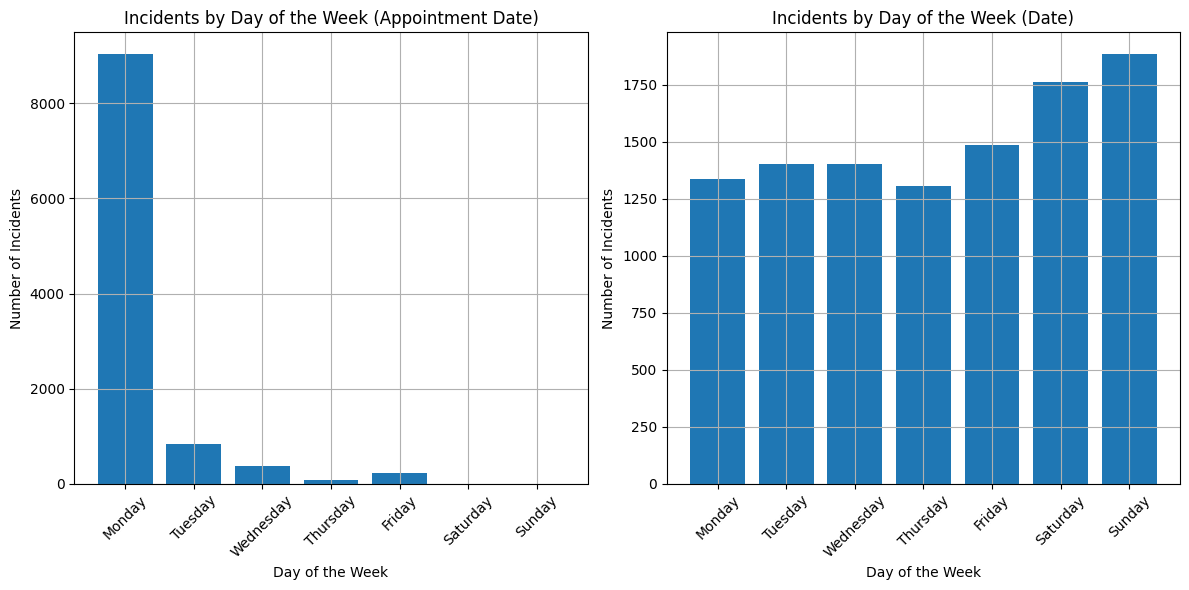

In [ ]:
import matplotlib.pyplot as plt
# Convert the columns to datetime format
geocode['appointment_date'] = pd.to_datetime(geocode['appointment_date'], errors='coerce')
geocode['date'] = pd.to_datetime(geocode['date'], errors='coerce')

# Drop rows with missing dates
geocode.dropna(subset=['appointment_date', 'date'], inplace=True)

# Extract the day of the week (0 = Monday, 6 = Sunday)
geocode['appointment_day_of_week'] = geocode['appointment_date'].dt.dayofweek
geocode['date_day_of_week'] = geocode['date'].dt.dayofweek

# Create a pivot table to count incidents by day of the week for both columns
appointment_counts = geocode['appointment_day_of_week'].value_counts().sort_index()
date_counts = geocode['date_day_of_week'].value_counts().sort_index()

# Create an array with zeros for all days of the week
all_days = range(7)
appointment_counts = appointment_counts.reindex(all_days, fill_value=0)
date_counts = date_counts.reindex(all_days, fill_value=0)

# Create a list of day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the left graph (Appointment Date)
ax1.bar(day_names, appointment_counts)
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Incidents')
ax1.set_title('Incidents by Day of the Week (Appointment Date)')
ax1.set_xticklabels(day_names, rotation=45)
ax1.grid(True)

# Plot the right graph (Date)
ax2.bar(day_names, date_counts)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Incidents')
ax2.set_title('Incidents by Day of the Week (Date)')
ax2.set_xticklabels(day_names, rotation=45)
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
geocode.rename(columns={"race": "police_race"}, inplace=True)
geocode.rename(columns={"gender": "police_gender"}, inplace=True)
geocode.rename(columns={"age": "police_age"}, inplace=True)
geocode

,trr_id,rd_no,cr_no_obtained,subject_cb_no,event_no,beat,block,street_direction,street_name,location,...,star9,star10,star11,sworn,unit_id,unit_detail,star,source,appointment_day_of_week,date_day_of_week
0,7.0,HK-131349,NaN,15703260.0,401716237,1131.0,4499.0,West,VAN BUREN ST,STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,5
1,5554.0,HK801325,NaN,16031304.0,434511047,1132.0,3999.0,West,FLOURNOY ST,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,4
2,15280.0,HM348634,NaN,16533991.0,613309864,1121.0,3299.0,West,HURON ST,STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,5
3,33.0,HK149368,NaN,15712445.0,402711046,1112.0,899.0,North,SPRINGFIELD AVE,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,1
4,40.0,HK151340,NaN,15713384.0,402813874,1115.0,4299.0,West,WILCOX ST,ALLEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,96387.0,HZ219663,1080034.0,19292598.0,1610009159,2223.0,8899.0,South,NORMAL AVE,STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,5
10575,96395.0,HZ221025,1080051.0,19293191.0,1610111757,1112.0,3799.0,West,CHICAGO AVE,GAS STATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,6
10576,96406.0,HZ215057,NaN,19293396.0,1610202999,1924.0,3299.0,North,SHEFFIELD AVE,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,0
10577,96432.0,HZ222592,NaN,1929386.0,1610301380,324.0,7499.0,South,EAST END AVE,SIDEWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,0,1


In [ ]:
df = geocode[["uid","date","time","location","address","lon","lat","police_race","subject_race","police_gender","subject_gender","police_age","subject_age"]]
df

,uid,date,time,location,address,lon,lat,police_race,subject_race,police_gender,subject_gender,police_age,subject_age
0,a7e28960-a33d-43bc-8707-d99b0c558e44,2004-01-17,20:04:00,STREET,4499 West VAN BUREN ST,-87.740300,41.875104,WHITE HISPANIC,BLACK,M,MALE,39.0,25.0
1,a7e28960-a33d-43bc-8707-d99b0c558e44,2004-12-10,16:00:00,APARTMENT,3999 West FLOURNOY ST,-87.725230,41.872454,WHITE HISPANIC,BLACK,M,MALE,39.0,30.0
2,a7e28960-a33d-43bc-8707-d99b0c558e44,2006-05-13,13:35:00,STREET,3299 West HURON ST,-87.711498,41.893695,WHITE HISPANIC,BLACK,M,MALE,39.0,32.0
3,20add28e-0569-4633-a2fc-1820d25c7171,2004-01-27,16:37:00,APARTMENT,899 North SPRINGFIELD AVE,-87.726270,41.897200,WHITE,BLACK,M,MALE,48.0,37.0
4,827d7e7b-c5be-4d38-ad63-b38ffef268fc,2004-01-28,18:55:00,ALLEY,4299 West WILCOX ST,-87.732794,41.878701,WHITE,BLACK,M,MALE,40.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,f7d0270d-8055-4044-968c-f5c020c84abe,2016-04-09,15:46:00,STREET,8899 South NORMAL AVE,-87.636117,41.732721,WHITE,BLACK,M,MALE,34.0,35.0
10575,cd5fe97b-8d15-4211-804d-c6db1639ac84,2016-04-10,19:23:00,GAS STATION,3799 West CHICAGO AVE,-87.721026,41.895332,ASIAN/PACIFIC ISLANDER,BLACK,M,MALE,31.0,26.0
10576,bdbf0e36-2816-40cd-9e19-424b2bbd2ebd,2016-04-11,8:33:00,APARTMENT,3299 North SHEFFIELD AVE,-87.654049,41.941621,WHITE,BLACK,F,MALE,46.0,25.0
10577,5d3a6398-73cc-4d3d-8e71-7150d60b9c57,2016-04-12,4:16:00,SIDEWALK,7499 South EAST END AVE,-87.583403,41.759831,WHITE,BLACK,F,MALE,42.0,30.0


# **Convert Gender into the same type**

In [ ]:
df["police_gender"].replace({"F": "FEMALE", "M": "MALE"}, inplace=True)
df

<ipython-input-8-440a1e30bd85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["police_gender"].replace({"F": "FEMALE", "M": "MALE"}, inplace=True)


,uid,date,time,location,address,lon,lat,police_race,subject_race,police_gender,subject_gender,police_age,subject_age
0,a7e28960-a33d-43bc-8707-d99b0c558e44,2004-01-17,20:04:00,STREET,4499 West VAN BUREN ST,-87.740300,41.875104,WHITE HISPANIC,BLACK,MALE,MALE,39.0,25.0
1,a7e28960-a33d-43bc-8707-d99b0c558e44,2004-12-10,16:00:00,APARTMENT,3999 West FLOURNOY ST,-87.725230,41.872454,WHITE HISPANIC,BLACK,MALE,MALE,39.0,30.0
2,a7e28960-a33d-43bc-8707-d99b0c558e44,2006-05-13,13:35:00,STREET,3299 West HURON ST,-87.711498,41.893695,WHITE HISPANIC,BLACK,MALE,MALE,39.0,32.0
3,20add28e-0569-4633-a2fc-1820d25c7171,2004-01-27,16:37:00,APARTMENT,899 North SPRINGFIELD AVE,-87.726270,41.897200,WHITE,BLACK,MALE,MALE,48.0,37.0
4,827d7e7b-c5be-4d38-ad63-b38ffef268fc,2004-01-28,18:55:00,ALLEY,4299 West WILCOX ST,-87.732794,41.878701,WHITE,BLACK,MALE,MALE,40.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,f7d0270d-8055-4044-968c-f5c020c84abe,2016-04-09,15:46:00,STREET,8899 South NORMAL AVE,-87.636117,41.732721,WHITE,BLACK,MALE,MALE,34.0,35.0
10575,cd5fe97b-8d15-4211-804d-c6db1639ac84,2016-04-10,19:23:00,GAS STATION,3799 West CHICAGO AVE,-87.721026,41.895332,ASIAN/PACIFIC ISLANDER,BLACK,MALE,MALE,31.0,26.0
10576,bdbf0e36-2816-40cd-9e19-424b2bbd2ebd,2016-04-11,8:33:00,APARTMENT,3299 North SHEFFIELD AVE,-87.654049,41.941621,WHITE,BLACK,FEMALE,MALE,46.0,25.0
10577,5d3a6398-73cc-4d3d-8e71-7150d60b9c57,2016-04-12,4:16:00,SIDEWALK,7499 South EAST END AVE,-87.583403,41.759831,WHITE,BLACK,FEMALE,MALE,42.0,30.0


In [ ]:
df.columns.tolist()

['uid',
 'date',
 'time',
 'location',
 'address',
 'lon',
 'lat',
 'police_race',
 'subject_race',
 'police_gender',
 'subject_gender',
 'police_age',
 'subject_age']

# **2004-2016**

In [ ]:
df['date'] = pd.to_datetime(df['date'] )

# Extract unique years from the 'appointment_date' column
unique_years = df['date'] .dt.year.unique()

# Print the unique years
print("Unique Years:", unique_years)
print("Years in Order", sorted(unique_years) )

Unique Years: [2004 2006 2010 2012 2007 2009 2005 2011 2013 2014 2008 2015 2016]
Years in Order [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


<ipython-input-10-f46762c952a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'] )


<ipython-input-11-034008c218b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']  = pd.to_datetime(df['date'] )
<ipython-input-11-034008c218b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'] .dt.year


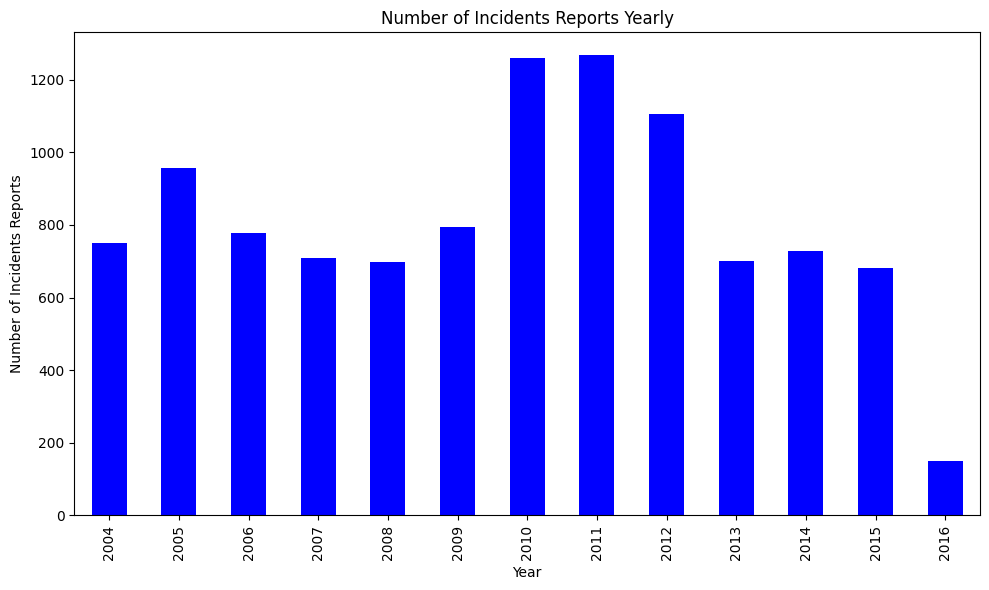

In [ ]:
import matplotlib.pyplot as plt

# Convert 'appointment_date' column to datetime
df['date']  = pd.to_datetime(df['date'] )

# Extract the year from 'appointment_date'
df['year'] = df['date'] .dt.year

# Count the number of appointments per year
indidentCount_per_year = df['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
indidentCount_per_year.plot(kind='bar', color='blue')
plt.title('Number of Incidents Reports Yearly')
plt.xlabel('Year')
plt.ylabel('Number of Incidents Reports')
plt.tight_layout()
plt.show()

In [ ]:
# Get the unique locations from the 'location' column
unique_locations = df['location'].unique()

# Print the unique locations as a list
print(list(unique_locations))


['STREET', 'APARTMENT', 'ALLEY', 'GAS STATION', 'SIDEWALK', 'HOSPITAL BUILDING/GROUNDS', 'PARK PROPERTY', 'CHA PARKING LOT/GROUNDS', 'PARKING LOT/GARAGE(NON.RESID.)', 'CTA PLATFORM', 'RESIDENCE PORCH/HALLWAY', 'OTHER', 'HIGHWAY/EXPRESSWAY', 'RESIDENCE', 'SMALL RETAIL STORE', 'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'POLICE FACILITY/VEH PARKING LOT', 'VACANT LOT/LAND', 'VACANT PROPERTY', 'ABANDONED BUILDING', 'RESIDENTIAL YARD (FRONT/BACK)', 'CHA HALLWAY/STAIRWELL/ELEVATOR', 'BAR OR TAVERN', 'GOVERNMENT BUILDING/PROPERTY', 'HOTEL/MOTEL', 'SCHOOL, PUBLIC, GROUNDS', 'CTA BUS', 'OTHER RAILROAD PROP / TRAIN DEPOT', 'JAIL / LOCK-UP FACILITY', 'FOREST PRESERVE', 'DRIVEWAY - RESIDENTIAL', 'CLEANING STORE', 'DEPARTMENT STORE', 'FACTORY/MANUFACTURING BUILDING', 'AIRPORT/AIRCRAFT', 'TAVERN/LIQUOR STORE', 'CHA APARTMENT', 'VEHICLE-COMMERCIAL', 'TAXICAB', 'CONVENIENCE STORE', 'RESIDENCE-GARAGE', 'GROCERY FOOD STORE', 'DRUG STORE', 'CTA TRAIN', 'CAR WASH', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL

In [ ]:
!pip install folium


<ipython-input-14-6ad1264bf912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-14-6ad1264bf912>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


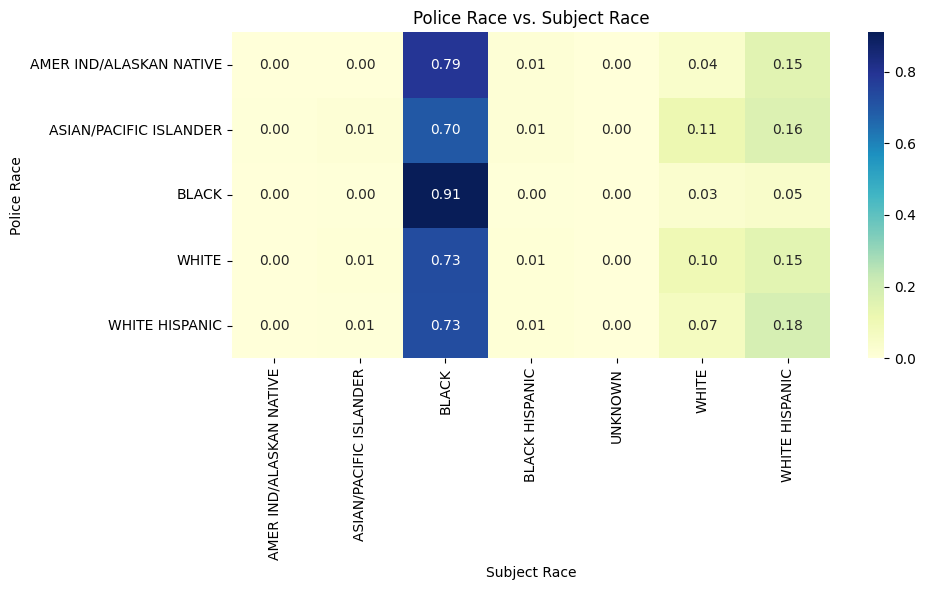

In [ ]:
import seaborn as sns
df['date'] = pd.to_datetime(df['date'])

# Extract year from 'appointment_date'
df['year'] = df['date'].dt.year

# Create a cross-tabulation (crosstab) between police_race and subject_race
cross_table = pd.crosstab(df['police_race'], df['subject_race'], normalize='index')

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Police Race vs. Subject Race')
plt.xlabel('Subject Race')
plt.ylabel('Police Race')
plt.tight_layout()
plt.show()

In Chicago, the seasons are typically divided as follows:

**Spring: March to May**
Spring in Chicago is characterized by gradually warming temperatures, melting snow, and blooming flowers. However, it can still be quite chilly in March, transitioning to milder conditions in April and May.


**Summer: June to August**
Summers in Chicago are warm and humid. June starts off mild, July and August are the hottest months, with temperatures often reaching the 80s to 90s Fahrenheit (25-35°C). This is the time for outdoor activities, festivals, and enjoying the city's parks and Lake Michigan beaches.


**Fall (Autumn): September to November**
Fall in Chicago brings cooler temperatures and colorful foliage. September is often pleasant, with temperatures gradually cooling. October sees the peak of fall colors, and November starts to get colder, leading into winter.


**Winter: December to February**
Winters in Chicago can be very cold, with temperatures often dropping below freezing. Snowfall is common, and the city experiences a "wind chill" factor that can make the cold feel even more intense. December through February are the coldest months, with January often being the coldest of all. **bold text**

<ipython-input-15-62592f0a17ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-15-62592f0a17ed>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-15-62592f0a17ed>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

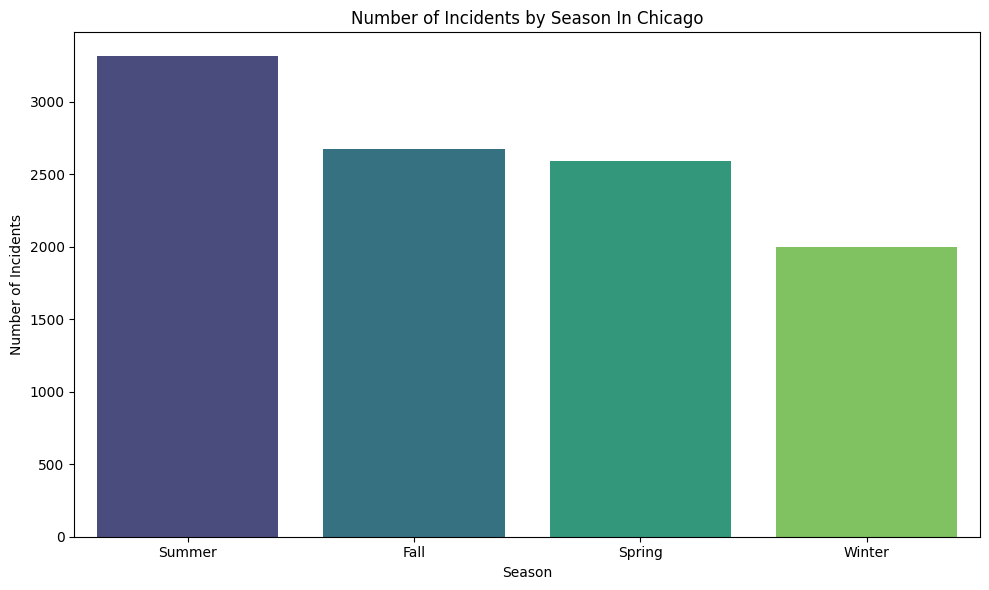

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define a function to get the season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Extract month and create a 'season' column
df['month'] = df['date'].dt.month
df['season'] = df['month'].apply(get_season)

# Count the number of incidents for each season
season_counts = df['season'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Number of Incidents by Season In Chicago')
plt.xlabel('Season')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


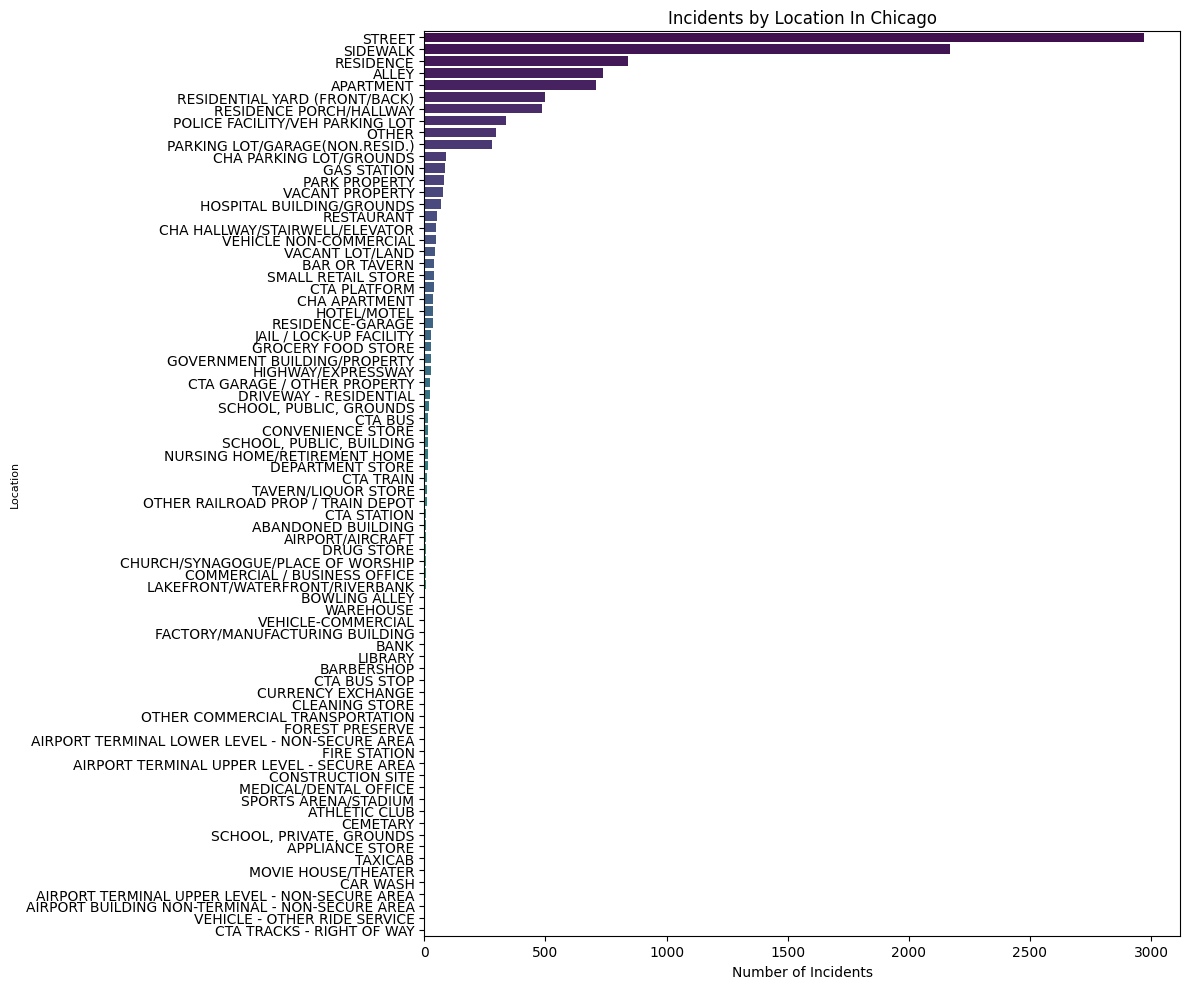

In [ ]:
location_counts = df['location'].value_counts()

# Sort locations by the highest incidents happened to lowest
sorted_locations = location_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_locations.values, y=sorted_locations.index, palette='viridis')
plt.title('Incidents by Location In Chicago')
plt.xlabel('Number of Incidents')
plt.ylabel('Location', fontsize=8)
plt.tight_layout()
plt.show()


<ipython-input-17-86b4c79d708d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-17-86b4c79d708d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


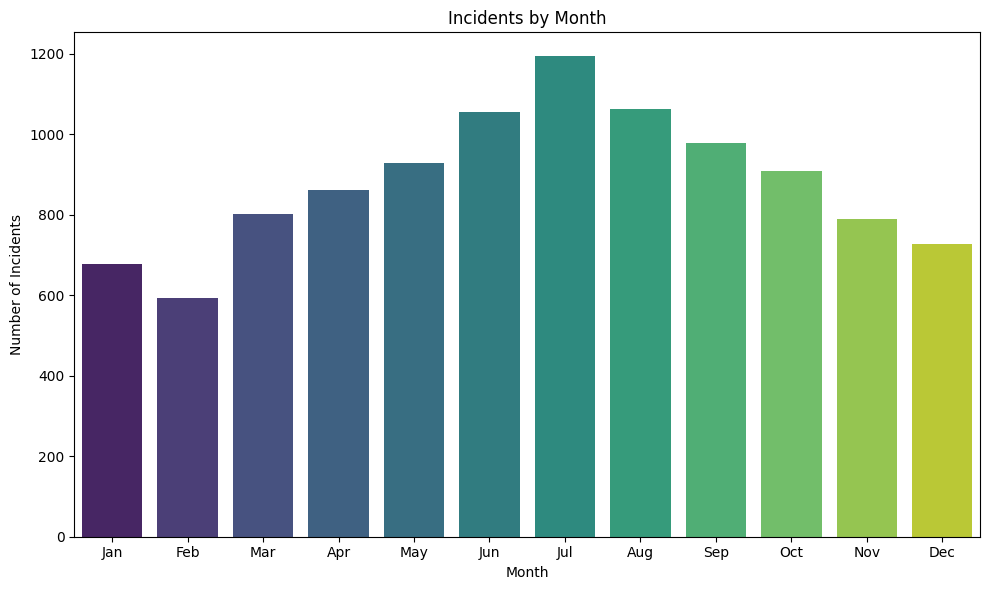

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month from 'appointment_date'
df['month'] = df['date'].dt.month

# Group data by month and count incidents in each month
month_counts = df['month'].value_counts()

# Sort months by the highest incidents happened to lowest
sorted_months = month_counts.sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_months.index, y=sorted_months.values, palette='viridis')
plt.title('Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


<ipython-input-18-5d5a6073a825>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= pd.to_datetime(df['date'])
<ipython-input-18-5d5a6073a825>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['date'].dt.dayofweek


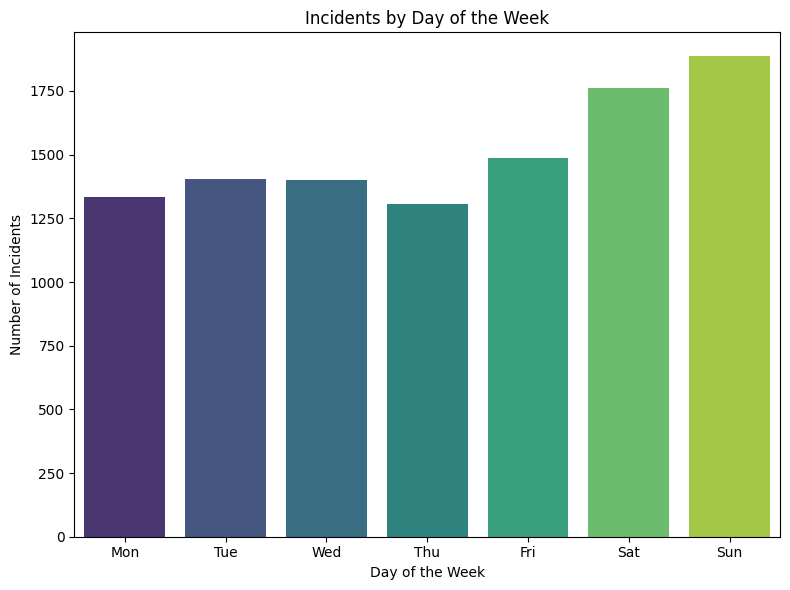

In [ ]:
# Convert 'date' column to datetime
df['date']= pd.to_datetime(df['date'])

# Extract day of the week from 'date' (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Group data by day of the week and count incidents for each day
day_counts = df['day_of_week'].value_counts()

# Sort days of the week by the highest incidents happened to lowest
sorted_days = day_counts.sort_index()

# Define day names for x-axis labels
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_days.index, y=sorted_days.values, palette='viridis')
plt.title('Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(range(7), day_names)
plt.tight_layout()
plt.show()

<ipython-input-19-ec08793f59e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-19-ec08793f59e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-19-ec08793f59e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

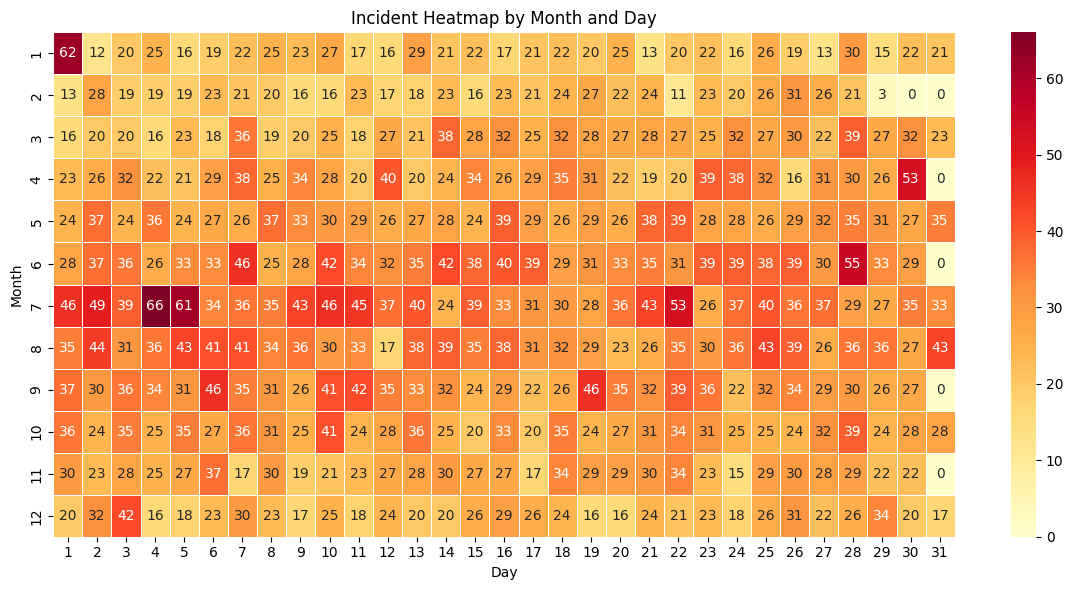

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and day from 'appointment_date'
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Create a pivot table to count incidents by month and day
incident_counts = df.pivot_table(index='month', columns='day', values='uid', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(incident_counts, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Incident Heatmap by Month and Day')
plt.xlabel('Day')
plt.ylabel('Month')

plt.tight_layout()
plt.show()

<ipython-input-26-4dad98646989>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
<ipython-input-26-4dad98646989>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_period'] = df['time'].apply(categorize_time_period)


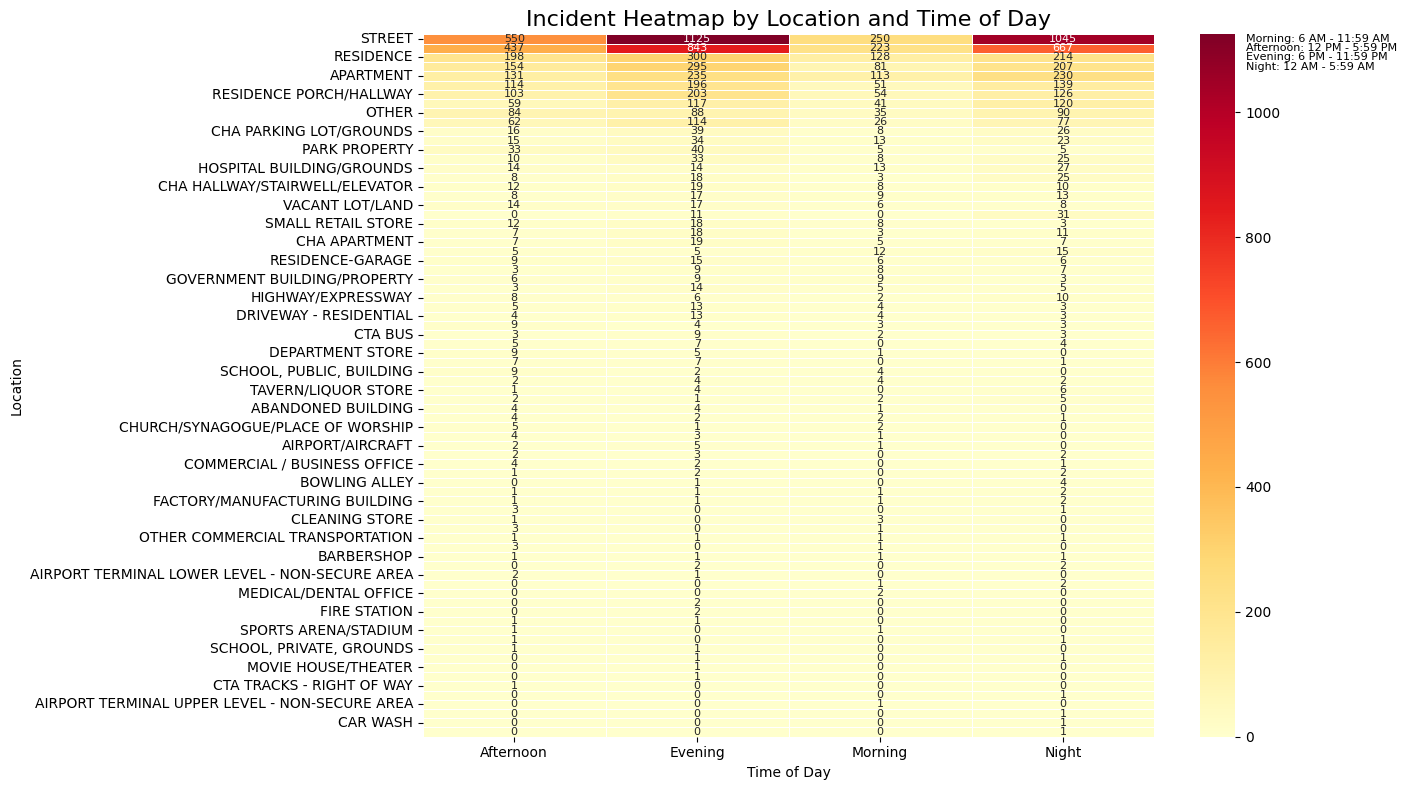

In [ ]:
# Define time periods
time_periods = {
    'Morning': range(6, 12),     # 6 AM to 11:59 AM
    'Afternoon': range(12, 18),  # 12 PM to 5:59 PM
    'Evening': range(18, 24),    # 6 PM to 11:59 PM
    'Night': [*range(0, 6)]      # 12 AM to 5:59 AM
}

# Convert time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Create a function to categorize time periods
def categorize_time_period(time):
    for period, hours in time_periods.items():
        if time.hour in hours:
            return period

# Apply the time categorization
df['time_period'] = df['time'].apply(categorize_time_period)

# Create a pivot table to count incidents by location and time period
pivot_df = df.pivot_table(index='location', columns='time_period', values='uid', aggfunc='count', fill_value=0)

# Sort rows by the highest number of incidents
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='Total', ascending=False)
pivot_df.drop('Total', axis=1, inplace=True)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, annot_kws={"size": 8})
plt.title('Incident Heatmap by Location and Time of Day', fontsize=16)  # Increase title font size
plt.xlabel('Time of Day')
plt.ylabel('Location')


time_period_definitions = {
    'Morning': '6 AM - 11:59 AM',
    'Afternoon': '12 PM - 5:59 PM',
    'Evening': '6 PM - 11:59 PM',
    'Night': '12 AM - 5:59 AM'
}
for i, (period, definition) in enumerate(time_period_definitions.items()):
    plt.text(len(time_periods) + 0.5, i + 0.5, f'{period}: {definition}', ha='left', va='center', fontsize=8)


plt.tight_layout()
plt.show()

<ipython-input-33-3bd660b9e561>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
<ipython-input-33-3bd660b9e561>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_period'] = df['time'].apply(categorize_time_period)
<ipython-input-33-3bd660b9e561>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

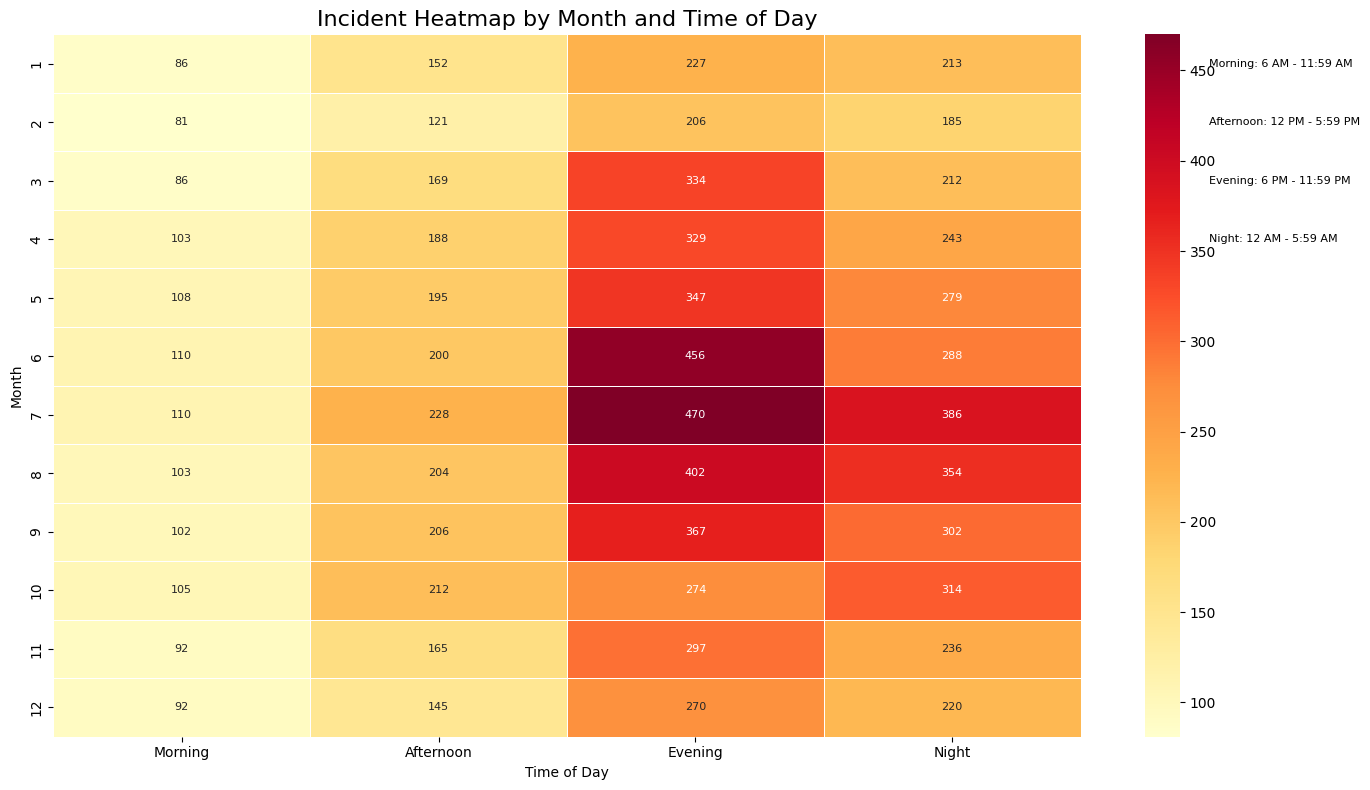

In [ ]:
# Define time periods
time_periods = {
    'Morning': range(6, 12),     # 6 AM to 11:59 AM
    'Afternoon': range(12, 18),  # 12 PM to 5:59 PM
    'Evening': range(18, 24),    # 6 PM to 11:59 PM
    'Night': [*range(0, 6)]      # 12 AM to 5:59 AM
}

# Convert time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Create a function to categorize time periods
def categorize_time_period(time):
    for period, hours in time_periods.items():
        if time.hour in hours:
            return period

# Apply the time categorization
df['time_period'] = df['time'].apply(categorize_time_period)

# Extract month from date column
df['month'] = df['date'].dt.month

# Create a pivot table to count incidents by month and time period
pivot_df = df.pivot_table(index='month', columns='time_period', values='uid', aggfunc='count', fill_value=0)

# Sort columns by the order of time periods
pivot_df = pivot_df[time_periods.keys()]

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, annot_kws={"size": 8})
plt.title('Incident Heatmap by Month and Time of Day', fontsize=16)  # Increase title font size
plt.xlabel('Time of Day')
plt.ylabel('Month')

time_period_definitions = {
    'Morning': '6 AM - 11:59 AM',
    'Afternoon': '12 PM - 5:59 PM',
    'Evening': '6 PM - 11:59 PM',
    'Night': '12 AM - 5:59 AM'
}
for i, (period, definition) in enumerate(time_period_definitions.items()):
    plt.text(len(time_periods) + 0.5, i + 0.5, f'{period}: {definition}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


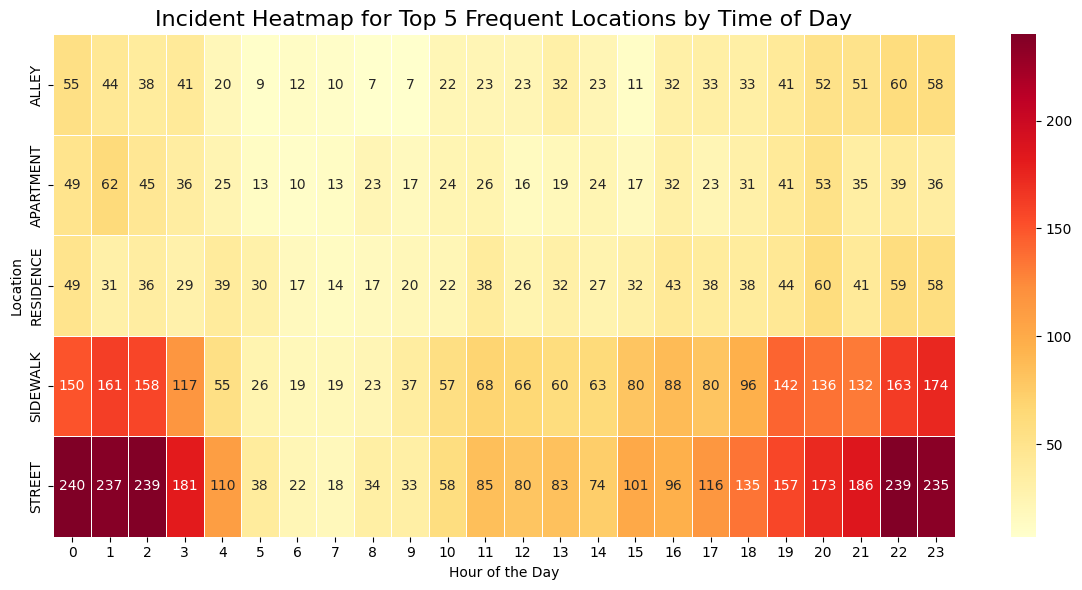

In [ ]:
# Filter and select the top 5 frequent locations
top_locations = df['location'].value_counts().head(5).index
filtered_df = df[df['location'].isin(top_locations)]

# Create a pivot table to count incidents by location and time
pivot_df = filtered_df.pivot_table(index='location', columns=df['time'].dt.hour, values='uid', aggfunc='count', fill_value=0)

# Sort columns by the order of hours
pivot_df = pivot_df.reindex(columns=range(24))

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Incident Heatmap for Top 5 Frequent Locations by Time of Day', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Location')

plt.tight_layout()
plt.show()


<ipython-input-36-e51edcfe6c78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


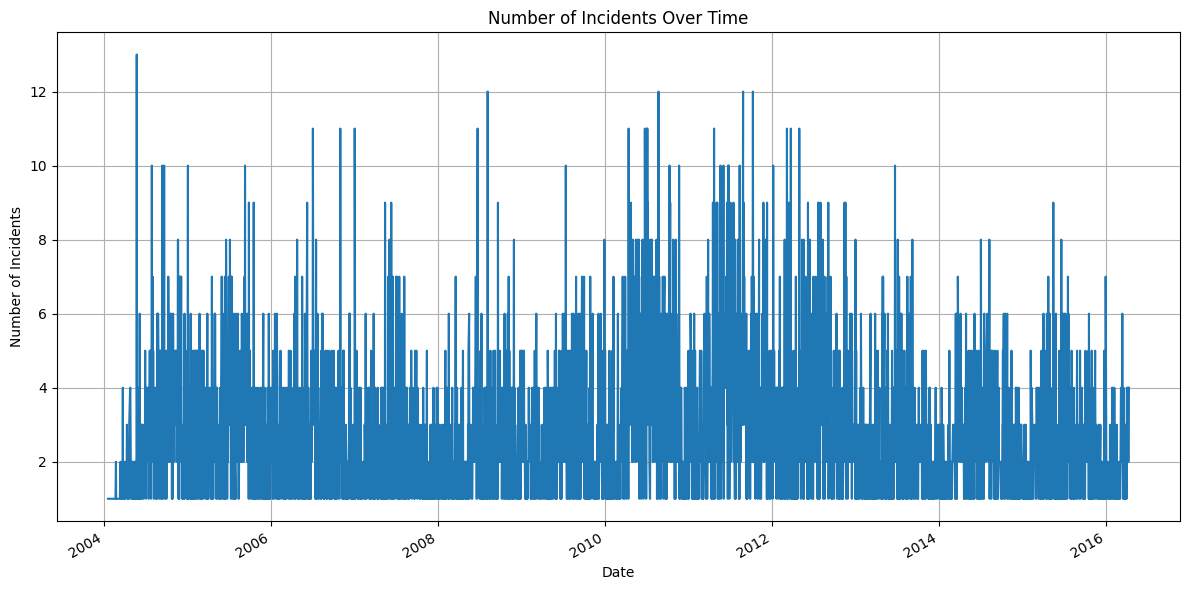

In [ ]:
# Convert 'appointment_date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group incidents by date and count the number of occurrences
incident_counts_by_date = df.groupby('date').size()

# Create a time series plot
plt.figure(figsize=(12, 6))
incident_counts_by_date.plot()
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-39-322f8aab0a67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


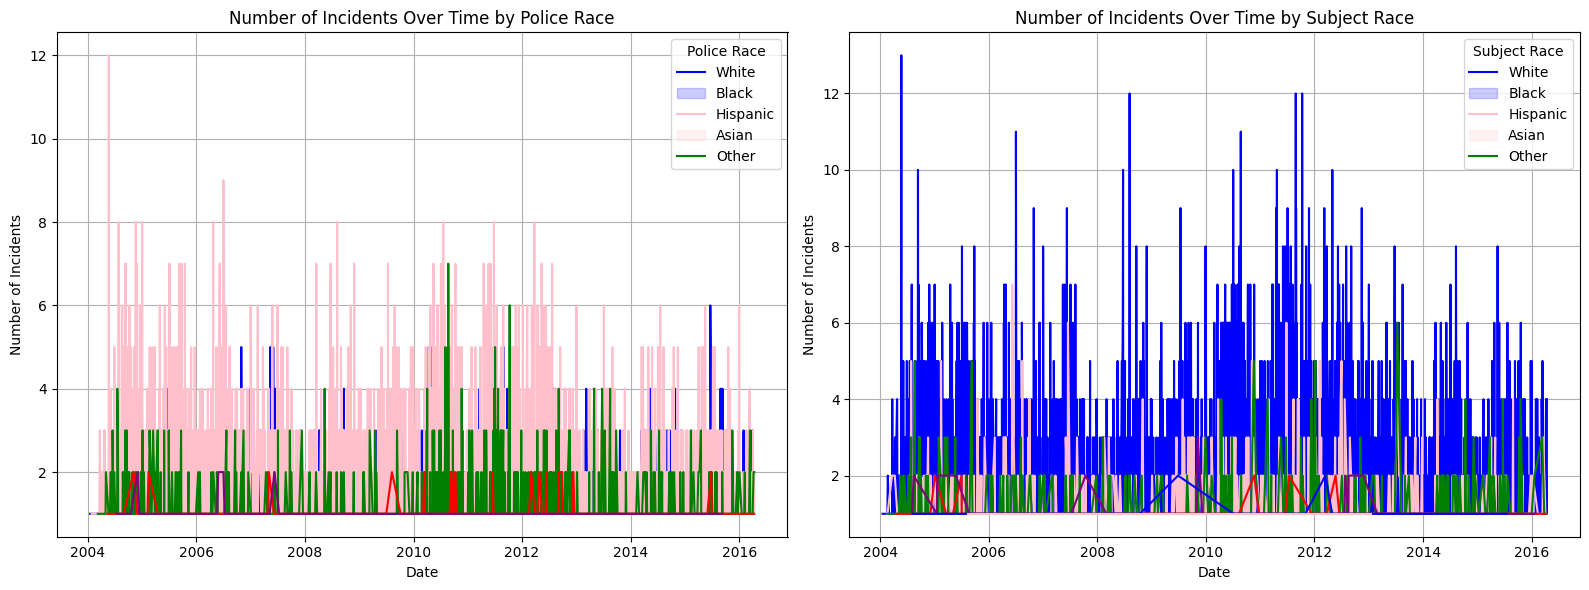

In [ ]:


# Convert 'appointment_date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define a mapping of race categories to colors
race_color_mapping = {
    'White': 'blue',
    'Black': 'pink',
    'Hispanic': 'green',
    'Asian': 'red',
    'Other': 'purple'
}

# Group incidents by date, police race, and subject race, and count the number of occurrences
incident_counts_by_police_race = df.groupby(['date', 'police_race']).size().reset_index(name='count_police')
incident_counts_by_subject_race = df.groupby(['date', 'subject_race']).size().reset_index(name='count_subject')

# Create subplots with two time series plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for police race
sns.lineplot(data=incident_counts_by_police_race, x='date', y='count_police', hue='police_race', ax=axes[0], palette=race_color_mapping.values())
axes[0].set_title('Number of Incidents Over Time by Police Race')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Incidents')
axes[0].grid(True)
axes[0].legend(title='Police Race', labels=race_color_mapping.keys())

# Plot for subject race
sns.lineplot(data=incident_counts_by_subject_race, x='date', y='count_subject', hue='subject_race', ax=axes[1], palette=race_color_mapping.values())
axes[1].set_title('Number of Incidents Over Time by Subject Race')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Incidents')
axes[1].grid(True)
axes[1].legend(title='Subject Race', labels=race_color_mapping.keys())

plt.tight_layout()
plt.show()


<ipython-input-49-a85149b0f8f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
<ipython-input-49-a85149b0f8f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-49-a85149b0f8f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

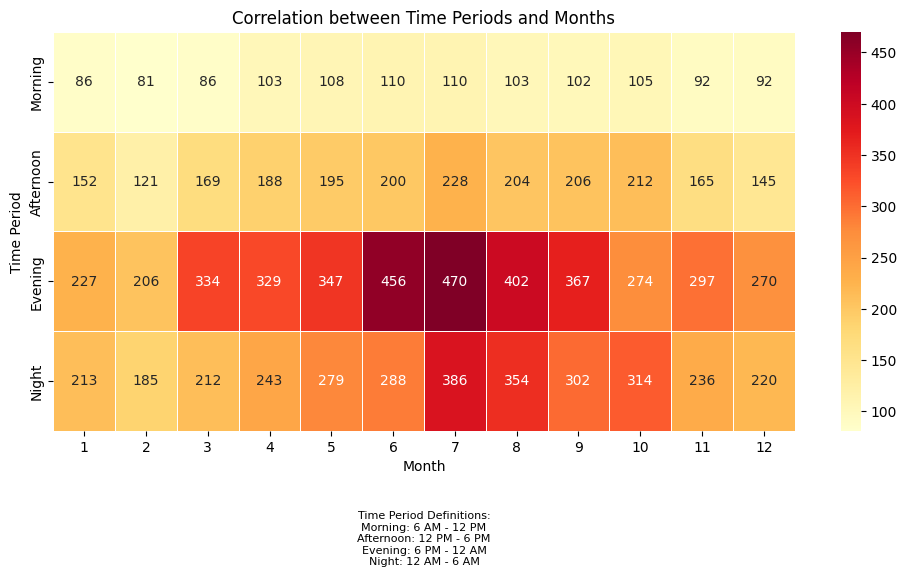

In [ ]:
# Convert 'time' to time format
df['time'] = pd.to_datetime(df['time'])

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month and season from 'date'
df['month'] = df['date'].dt.month

# Define time periods
time_periods = {
    'Morning': range(6, 12),     # 6 AM to 11:59 AM
    'Afternoon': range(12, 18),  # 12 PM to 5:59 PM
    'Evening': range(18, 24),    # 6 PM to 11:59 PM
    'Night': [*range(0, 6)]      # 12 AM to 5:59 AM
}

# Create a function to categorize time periods
def categorize_time_period(time):
    for period, hours in time_periods.items():
        if time.hour in hours:
            return period

# Apply the time categorization
df['time_period'] = df['time'].apply(categorize_time_period)

# Create a pivot table to calculate the number of incidents
pivot_table = df.pivot_table(index='time_period', columns='month', values='date', aggfunc='count', fill_value=0)

# Sort time periods
pivot_table = pivot_table.reindex(index=['Morning', 'Afternoon', 'Evening', 'Night'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Correlation between Time Periods and Months')
plt.xlabel('Month')
plt.ylabel('Time Period')

# Add time period definitions to the bottom of the graph
bottom_definition = 'Time Period Definitions:'
for period, definition in time_period_definitions.items():
    bottom_definition += f'\n{period}: {definition}'
plt.text(0.5, -0.2, bottom_definition, ha='center', va='top', fontsize=8, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


<ipython-input-52-6da1bf9277c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
<ipython-input-52-6da1bf9277c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-52-6da1bf9277c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

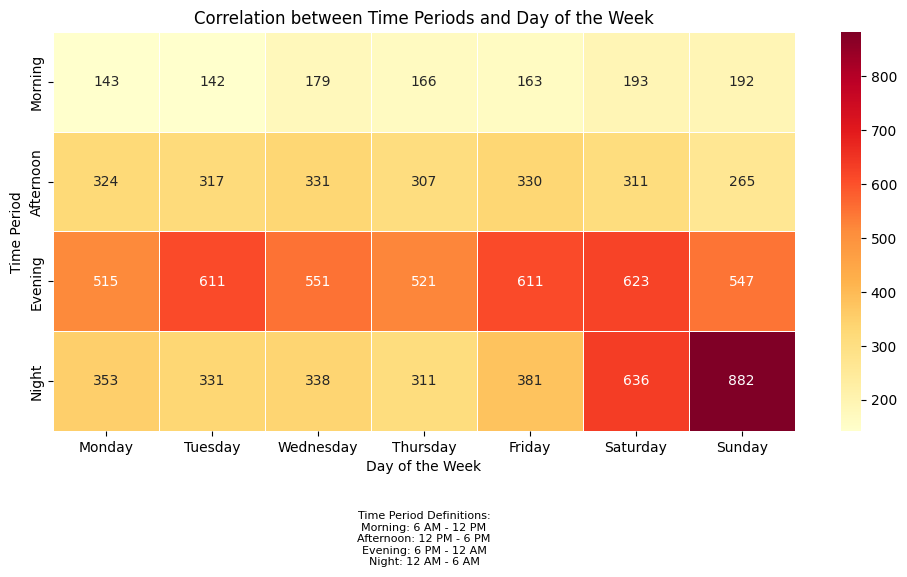

In [ ]:
# Convert 'time' to time format
df['time'] = pd.to_datetime(df['time'])

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract day of the week from 'date'
df['day_of_week'] = df['date'].dt.dayofweek

# Define a dictionary to map day of the week values to day names
day_of_week_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Map the day of the week values to day names
df['day_name'] = df['day_of_week'].map(day_of_week_mapping)

# Define time periods
time_periods = {
    'Morning': range(6, 12),     # 6 AM to 11:59 AM
    'Afternoon': range(12, 18),  # 12 PM to 5:59 PM
    'Evening': range(18, 24),    # 6 PM to 11:59 PM
    'Night': [*range(0, 6)]      # 12 AM to 5:59 AM
}

# Create a function to categorize time periods
def categorize_time_period(time):
    for period, hours in time_periods.items():
        if time.hour in hours:
            return period

# Apply the time categorization
df['time_period'] = df['time'].apply(categorize_time_period)

# Create a pivot table to calculate the number of incidents
pivot_table = df.pivot_table(index='time_period', columns='day_name', values='date', aggfunc='count', fill_value=0)

# Sort day of the week and time periods
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
pivot_table = pivot_table.reindex(index=time_order, columns=day_order)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Correlation between Time Periods and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Time Period')

# Add time period definitions to the bottom of the graph
bottom_definition = 'Time Period Definitions:'
for period, definition in time_period_definitions.items():
    bottom_definition += f'\n{period}: {definition}'
plt.text(0.5, -0.2, bottom_definition, ha='center', va='top', fontsize=8, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [ ]:
# pip install gmplot


In [ ]:
# import folium
# from folium.plugins import HeatMap
# import pandas as pd

# # Load your data
# # df = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with your file

# # Initialize the map centered around Chicago
# chicago_coordinates = [41.8781, -87.6298]
# incident_map = folium.Map(location=chicago_coordinates, zoom_start=10)

# # Create a HeatMap layer with latitudes and longitudes
# heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]
# HeatMap(heat_data).add_to(incident_map)

# # Save the map as an HTML file
# incident_map.save("incident_heatmap.html")


In [ ]:
# from google.colab import files
# files.download('incident_heatmap.html')


In [ ]:
# !pip install gmplot


In [ ]:
# import pandas as pd
# from gmplot import gmplot

# # Create a gmplot object centered around Chicago
# gmap = gmplot.GoogleMapPlotter(41.8781, -87.6298, 10)

# # Add markers for each incident's latitude and longitude
# for index, row in df.iterrows():
#     gmap.marker(row['lat'], row['lon'])

# # Save the map to an HTML file
# gmap.draw('incidents_map.html')


In [ ]:
# files.download('incident_heatmap.html')